<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Tools-used" data-toc-modified-id="Tools-used-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Tools used</a></span></li></ul></li><li><span><a href="#EDA" data-toc-modified-id="EDA-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>EDA</a></span><ul class="toc-item"><li><span><a href="#Data-Cleaning" data-toc-modified-id="Data-Cleaning-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Data Cleaning</a></span></li></ul></li><li><span><a href="#LASSO-Regression" data-toc-modified-id="LASSO-Regression-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>LASSO Regression</a></span><ul class="toc-item"><li><span><a href="#Cross-Validation-for-$\alpha$" data-toc-modified-id="Cross-Validation-for-$\alpha$-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Cross-Validation for $\alpha$</a></span></li><li><span><a href="#Model-Fit" data-toc-modified-id="Model-Fit-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Model Fit</a></span></li></ul></li><li><span><a href="#Ridge-Regression" data-toc-modified-id="Ridge-Regression-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Ridge Regression</a></span><ul class="toc-item"><li><span><a href="#Estimating-uncertanity-with-Ridge" data-toc-modified-id="Estimating-uncertanity-with-Ridge-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Estimating uncertanity with Ridge</a></span></li></ul></li><li><span><a href="#Elastic-Net-(Lasso-+-Ridge)" data-toc-modified-id="Elastic-Net-(Lasso-+-Ridge)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Elastic Net (Lasso + Ridge)</a></span><ul class="toc-item"><li><span><a href="#Cross-Validation-for-$\alpha,-\lambda$" data-toc-modified-id="Cross-Validation-for-$\alpha,-\lambda$-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Cross-Validation for $\alpha, \lambda$</a></span></li><li><span><a href="#Bootstrapping-for-significant-coefficients" data-toc-modified-id="Bootstrapping-for-significant-coefficients-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Bootstrapping for significant coefficients</a></span></li></ul></li><li><span><a href="#Principle-Component-Regression-(PCR)" data-toc-modified-id="Principle-Component-Regression-(PCR)-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Principle Component Regression (PCR)</a></span><ul class="toc-item"><li><span><a href="#Finding-the-optimal-number-of-components" data-toc-modified-id="Finding-the-optimal-number-of-components-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Finding the optimal number of components</a></span></li><li><span><a href="#Evaluating-Significant-Genes" data-toc-modified-id="Evaluating-Significant-Genes-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Evaluating Significant Genes</a></span></li><li><span><a href="#PCR-Top-Positive/Negative-Genes" data-toc-modified-id="PCR-Top-Positive/Negative-Genes-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>PCR Top Positive/Negative Genes</a></span></li></ul></li><li><span><a href="#Comparison" data-toc-modified-id="Comparison-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Comparison</a></span></li></ul></div>

# Dimension reduction / Regularization
We perform regression techniques designed to reduce the dimension of the data. When P is large relative to N, we encounter the problem of the $\textbf{curse of dimensionality}$. Basically when the dimension grows, data becomes more sparse. This can lead to problems with overfitting and associating variables that aren't related. We use LASSO, Ridge, Elastic Net, and Principle Component Regression to peform regularization and dimension reduction
### Tools used
We will mostly use the **`sklearn`** library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import t
from statsmodels.regression.linear_model import OLS

from sklearn import preprocessing # Scaling
from sklearn.linear_model import Lasso, Ridge, ElasticNet, LinearRegression
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV
from sklearn.decomposition import PCA
from sklearn import model_selection
from sklearn.metrics import mean_squared_error

## EDA
As we can see, there are 5149 genes and only 102 observations! We cannot perform multiple regression on this dataset because $X^{'}X$ is not invertible.

In [2]:
genes = pd.read_csv('GeneExpression2.txt', sep=" ")
print(genes.shape)
genes.head()

(102, 5150)


,Malignant,1260_s_at,1909_at,31639_f_at,32041_r_at,32086_at,32179_s_at,32331_at,32783_at,33334_at,...,36362_at,1709_g_at,36837_at,38940_at,37141_at,39979_at,34682_at,35635_at,36097_at,31771_at
0,0.013538,2.781613,4.390829,3.353674,2.587266,3.197381,2.495582,3.957500,7.253459,4.080288,...,3.096594,4.830983,3.270169,2.358879,6.300150,6.179502,4.073739,5.392437,9.087284,2.617124
1,0.190408,3.091720,4.679300,4.082109,3.323379,3.564034,2.506098,4.185018,6.963955,3.737206,...,3.751392,4.358207,4.412468,2.422339,3.093921,5.120525,5.205774,5.525375,5.366550,3.163398
2,0.181055,2.836386,4.698752,4.308980,2.887024,3.560608,2.566259,4.229297,6.944378,3.888011,...,3.857687,4.380085,4.192691,2.584036,3.064807,5.293856,4.868696,5.294992,5.990795,3.330722
3,0.027590,3.376892,4.754921,3.583298,3.389157,3.510007,2.559978,4.078641,6.932522,3.678257,...,4.091175,4.467538,4.024866,2.574266,3.599903,5.198681,5.235519,5.126429,6.060436,3.179971
4,0.038723,2.898819,4.723345,3.926955,2.803978,3.327991,2.661620,3.878328,6.927675,3.842573,...,3.919391,4.373989,4.469515,2.617985,2.837357,5.369670,4.967915,5.169273,6.196087,3.001127


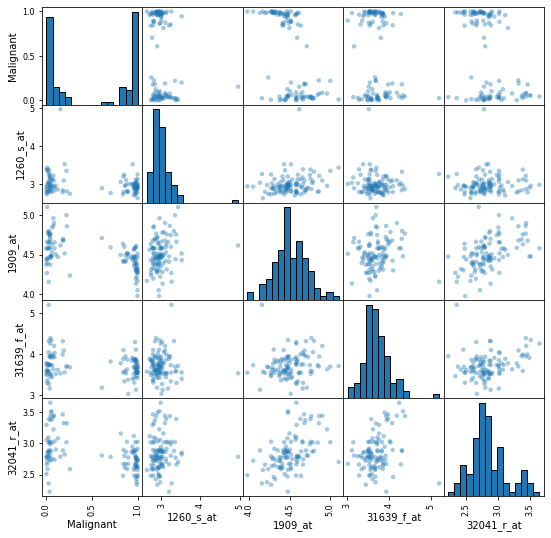

In [4]:
grr = pd.plotting.scatter_matrix(genes.iloc[:,:5], figsize=(9,9), marker='o',
                                 hist_kwds={'bins': 15, 'edgecolor': 'k'}, s=20, alpha=.4, range_padding=.1)

We can use the `.describe()` method to view summary statistics for each column. Note that the response (Malignant) is a value between 0 and 1, we could also have potential colinearity between covariataes, and non-normality.

In [5]:
genes.iloc[:,:5].describe() # Summary statistics.

,Malignant,1260_s_at,1909_at,31639_f_at,32041_r_at
count,102.000000,102.000000,102.000000,102.000000,102.000000
mean,0.511096,2.993938,4.509078,3.712805,2.853865
std,0.444238,0.270744,0.202497,0.308370,0.288606
min,0.001081,2.626965,3.973579,3.023796,2.226989
25%,0.043294,2.838982,4.385294,3.538719,2.664711
50%,0.655056,2.945158,4.480372,3.680573,2.802691
75%,0.974056,3.061298,4.634382,3.860830,3.016208
max,0.999308,4.964928,5.102009,5.194231,3.650040


### Data Cleaning
- Whenever we are doing penalized regression <u>**make sure to center and scale your covariates!**</u> We can use the `preprossing.scale()` function from the **`sklearn`** library. This will give slightly different answers than R's `scale()` function because it divides by n (and not n-1) for the standard deviation. 
- To ensure we don't predict outside the (0,1) boundary, we use the logit transform on the response. For the rest of this document, we will use logit(Malignant) as the response.

In [5]:
def ilogit(x): # Inverse
    return(1/(1+np.exp(-x)))

def logit(x):
    return(np.log(x/(1-x)))

genes['logitMal'] = logit(genes.Malignant) # Logit-transform (so we don't predict outside 0/1)
meanYlogit = np.mean(genes['logitMal'])
Y = genes['logitMal'] # Leave response as is
#Y = preprocessing.scale(genes['logitMal']) # scale()
X = preprocessing.scale(genes.iloc[:, 1:(genes.shape[1]-1)]) # Center+Scale data. Uses population standard deviation!!!
gene_names = genes.columns[1:(genes.shape[1]-1)]

## LASSO Regression
LASSO uses the L1 penalization (absolute value) on the beta coefficients. Python find the $\hat{\beta}$ that minimizes:
$$\frac{1}{2N}\sum_{i=1}^N(x_i^{'}\beta - y_i)^2 + \alpha\sum_{j=1}^p|\beta_j|.$$ 

The tuning parameter $\alpha$ determines how much to penalize the coefficient size. The larger the $\alpha$, the bigger the penalty and when $\alpha=0$, this reduces to OLS. LASSO is different from Ridge in that it will generally zero-out coefficients. 

Note that this is different from the R implementation, which uses $\lambda$ instead of $\alpha$. R also has a slightly different minimization equation/technique (see glmnet documentation), so the betas will be slightly different even for the same $\alpha$ (ie for alpha=.1, we get $\beta_1=-.1272$, R: -.1290). 

For more information on sklearn's penalized regression techniques, visit [here](https://scikit-learn.org/stable/modules/linear_model.html#ridge-regression).

### Cross-Validation for $\alpha$
We next do 5-fold Cross Validation for the optimal $\alpha$.

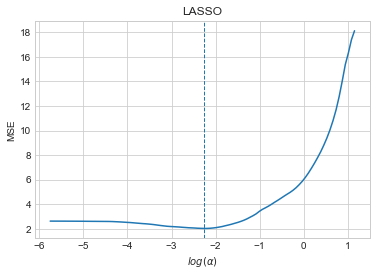

In [8]:
fit_lasso = LassoCV(cv=5).fit(X, Y) # 5 fold cross validation for alpha. Searches on log scale
fit_lasso.alpha_ # optimal alpha

plt.style.use('seaborn-whitegrid')
plt.plot(np.log(fit_lasso.alphas_), [np.mean(x) for x in fit_lasso.mse_path_]) # MSE path = errors for each fold
plt.axvline(x=np.log(fit_lasso.alpha_), ls='--', lw=1)
plt.xlabel(r'$log(\alpha)$')
plt.ylabel('MSE')
plt.title('LASSO')
plt.show()

### Model Fit
We can evaluate an $R^2$ like metric using the .score attribute. Don't forget to backtransform both X and Y.

In [9]:
def R2(preds, actual):
    return(1-sum((preds - actual)**2)/sum((actual-np.mean(actual))**2))

fit_lasso.coef_ # 5149 Coefficients

# Model fit (logit scale)
fit_lasso.score(X,Y) # R^2 (1 - SSM / SST) 
R2(fit_lasso.predict(X), Y) # same as above

# Original Scale
R2_og = R2(ilogit(fit_lasso.predict(X)), genes['Malignant']) 
print('In-Smple R^2: {}'.format(round(R2_og,5))) 

In-Smple R^2: 0.98965


## Ridge Regression

Ridge uses the L2 norm (squared) penalty on the beta coefficients. In sklearn, it it as follows:
$$\sum_{i=1}^N(x_i^{'}\beta - y_i)^2 + \alpha\sum_{j=1}^p\beta_j^2.$$ 

Again, $\alpha$ determines how much to penalize the coefficients and this will produce different results from R because R minimzies a different equation. in this form, Ridge has a closed form solution: $$\hat{\beta}_{Ridge} = (X^{'}X + \alpha I)^{-1}X^{'}y $$

In this section, we use Leave-One-Out cross validation to find the optimal $\alpha$. We run into problems because as $\alpha \rightarrow 0$,  $(X^{'}X + \alpha I)$ becomes computationally singular. Thus, we use $log(\alpha) = 4$ as our optimal cutoff, although this is somewhat arbitrary.

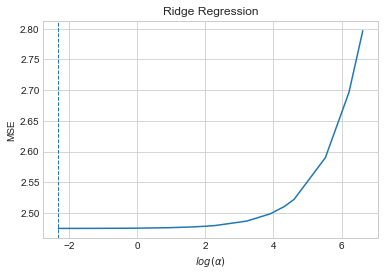

array([-0.02774721, -0.02380271, -0.01021755, ...,  0.00014071,
        0.0100412 , -0.00472577])

In [10]:
alphas_to_search = np.concatenate([np.array([1, 2.5, 5, 7.5])*10.0**x for x in np.arange(-1,3)])
fit_ridge_cv = RidgeCV(alphas=alphas_to_search, store_cv_values=True).fit(X, Y) # LOO cross validation for alpha. Searches on log scale.

plt.plot(np.log(fit_ridge_cv.alphas), np.mean(fit_ridge_cv.cv_values_, axis=0)) # MSE path = errors for each fold
plt.axvline(x=np.log(fit_ridge_cv.alpha_), ls='--', lw=1)
plt.xlabel(r'$log(\alpha)$')
plt.ylabel('MSE')
plt.title('Ridge Regression')
plt.show()

# Problem: ALphas that are too small get numerically unstable: we approach a singular matrix
# opt_alpha = np.exp(np.log(6.5/2*102)) # We'll use a point before graph asymptotes
opt_alpha = np.exp(4)

fit_ridge = Ridge(alpha=opt_alpha).fit(X, Y)
fit_ridge.coef_ # coefficients. Also (X'X + alpha*I)^(-1)*X'(y)

In [11]:
# # By Hand CV says the same thing...
# cv = model_selection.KFold(n_splits=10, shuffle=False)
# mse = []

# # Add compoents one at a time
# for i in alphas_to_search:
#     fun = Ridge(alpha=i)
#     score = -1*model_selection.cross_val_score(fun, X, Y, cv=cv, scoring='neg_mean_squared_error').mean()
#     mse.append(score)
# plt.plot(np.log(alphas_to_search), mse)
# plt.show()

### Estimating uncertanity with Ridge
Using the closed form solution for $\hat{\beta}_{ridge}$, we can derive estimates for $V(\hat{\beta}_{ridge})$ using matrix algebra. We check our coefficients from Ridge() using the closed form solution. The @ symbol is python's version of matrix multiplication. In the general linear model, one way to get the effective number of parameters is to take the trace of the Hat matrix. 

Due to the large number of small coefficients, we only have approximately 4.55 degrees of freedom. If we had used a smaller $\alpha$, we would have even lower degrees of freedom! 

In [11]:
# @ matrix multiplication
hat_pt = np.linalg.inv((X.T @ X) + opt_alpha*np.identity(X.shape[1])) @ X.T
betahat = hat_pt @ Y  # Note: Glmnet in R does not have the same closed form solution.
E = Y - X @ betahat

# One way to get p or effective number of parameters is to take the trace of the hat matrix
hat_matr = X @ hat_pt
df = genes.shape[0] - hat_matr.trace()
sigma2hat = (E.T @ E)/(df)
Var_betahat = hat_pt @ hat_pt.T * sigma2hat

# Confidence intervals
L = betahat + t.ppf(.025, df)*np.diagonal(Var_betahat)**.5
U = betahat + t.ppf(.975, df)*np.diagonal(Var_betahat)**.5
ests = pd.DataFrame({'Est': betahat, 'Lwr': L, 'Upr': U})
ests['Signif'] = ests['Lwr']*ests['Upr'] > 0
# print(pd.DataFrame([betahat, fit_ridge.coef_]).T.head()) # Coefficients match matrix multiplication
print('Degrees of freedom: {}'.format(df)) 
print('Number Significant: {}'.format(sum(ests['Signif']))) 

Degrees of freedom: 4.553173542621806
Number Significant: 605


## Elastic Net (Lasso + Ridge)
Elastic net is a combination of LASSO and Ridge. The $l_1$ ratio argument tells sklearn how much to emphasize LASSO over Ridge. It seeks to minimize:

$$\frac{1}{2N}\sum_{i=1}^N(x_i^{'}\beta - y_i)^2 + \alpha \left(l_1\sum_{j=1}^p|\beta_j| + \frac{1-l_1}{2}\sum_{j=1}^p\beta_j^2\right).$$ 

### Cross-Validation for $\alpha, \lambda$
Since there are now 2 tuning parameters, we use a 2D grid search to find the optimal parameters. This is shown in a Heat Map Below. Based on the results, it appears LASSO is best ($l_1$ ratios close to 1) and $\alpha \approx 0.1$ are optimal tuning parameters.

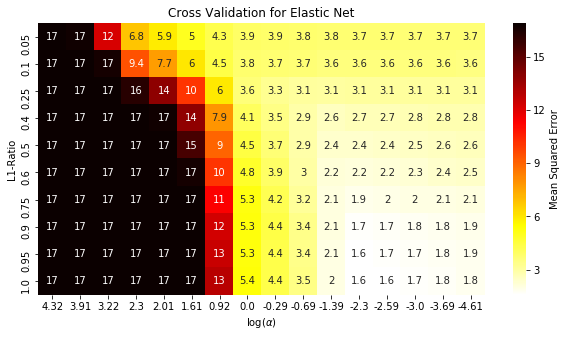

In [6]:
# Cross validation for alpha, lambda (0 - Ridge, 1 - lASSO)
weights_to_check = [.05, 0.1, 0.25, 0.4, 0.5, 0.6, 0.75, 0.9, .95, 1.0] # Values close to 0 don't converge
alphas_to_check = np.concatenate([np.array([1, 2.5, 5, 7.5])*10.0**x for x in np.arange(-2,2)])

model_enet = ElasticNetCV(l1_ratio=weights_to_check, alphas=alphas_to_check, max_iter=2500, cv=7).fit(X, Y) 
model_enet.alpha_ # 0.1
model_enet.l1_ratio_ # LASSO was best
cvs = np.mean(model_enet.mse_path_, axis=2)

plt.figure(figsize=(10,5))
htmp = sns.heatmap(cvs, cmap="hot_r", annot=True, cbar_kws={'label': 'Mean Squared Error'})
htmp.set_yticklabels(weights_to_check)
htmp.set_xticklabels(np.round(np.log(alphas_to_check),2)[::-1]) # For some rason I had to reverse this axis
plt.title('Cross Validation for Elastic Net')
plt.ylabel('L1-Ratio')
plt.xlabel(r'log($\alpha$)')
plt.show()   

### Bootstrapping for significant coefficients
Since there is no closed form solution, it's difficult to derive the standard errors. One thing we can do is simulate the sampling distribution of $\hat{\beta}$ using bootstrapping. That is, we generate several $\hat{\beta}$s by repeatedly sampling from the dataset with repacement. We then take the resulting $\hat{\beta}$ quantiles and evaluate each gene for significance. 

In [18]:
B = 5000
n = X.shape[0]
beta_boot = np.zeros((B, X.shape[1]))
for i in range(B):
    inds = np.random.choice(np.arange(n), n)
    beta_boot[i,:] = ElasticNet(alpha=0.1, l1_ratio=1).fit(X[inds,:],Y[inds]).coef_
betahats = np.mean(beta_boot, axis=0)

In [31]:
#L = 2*betahats - np.quantile(beta_boot, q=.975, axis=0) # Centered intervals
#U = 2*betahats - np.quantile(beta_boot, q=.025, axis=0) # Problem: These kept giving the same value for upr/lwr bounds (outside the estimates)
L = np.quantile(beta_boot, q=.025, axis=0)
U = np.quantile(beta_boot, q=.975, axis=0)

results = pd.DataFrame({'Est':betahats, 'Lwr': L, 'Upr':U}, index=gene_names)
results['Signif'] = results['Lwr']*results['Upr'] > 0

tol = 0
n_zero = sum(1*(abs(results['Upr'] - results['Lwr']) <= tol)*(abs(betahats) <= tol))
n_signif = sum(results['Signif'])
print('Total Significant: {}'.format(n_signif))
print('Total Not Significant: {}'.format(results.shape[0]-n_zero-n_signif))
print('Total Genes Eliminated: {}'.format(n_zero))

results_sig = results.loc[results['Signif'],:].copy(deep='True')
results_sig['absEst'] = np.absolute(results_sig['Est'])
results_sig.sort_values('absEst', inplace=True, ascending=False)
results_sig.head(10).drop(labels=['absEst','Signif'], axis=1)

Total Significant: 2
Total Not Significant: 1641
Total Genes Eliminated: 3506


,Est,Lwr,Upr
37639_at,1.225404,0.812991,1.607148
38087_s_at,-0.860041,-1.209362,-0.441190


## Principle Component Regression (PCR)
Principle components are orthogonal dimensions that explain the most variation in the data. They are obtained from the normalized eigenvectors of the covariance matrix. The corresponding eigenvalues measure how much variance is explained from the paticular component. The idea is to choose M\<\<P components, transform the data, and then perform regression. Let:

- $\boldsymbol{\Psi}$: (PxM) Component matrix. "Components" are on each column. Projects the data to a lower dimensional space.  
- $\textbf{Z} = \textbf{X}\boldsymbol{\Psi}$: (NxM) The original data ($\textbf{X}$) after projecting it to its principle axes. We perform multiple regression on this!
- If we model $Y \sim N(\theta_0 + \textbf{Z}\boldsymbol{\theta}, \sigma^2)$, then $(\theta_0, \boldsymbol{\theta})$ are the Regression coefficients for $\textbf{Z}$.
- The $\beta$ coefficients (for the original data) can be found by ($\theta_0, \boldsymbol{\Psi}\boldsymbol{\theta})$. We can then use matrix algebra to get $V(\hat{\beta})$

### Finding the optimal number of components
We can obtain the optimal number of components by Cross-Validation. One important note is that if `svd_solver` is not explicitly set to ``'full'``, python will use random techniques to get the eigenvector decomposition. Thus, every time this code is rerun, we will get different results. This is problematic for this dataset because of how huge P is relative to N; small changes in $\textbf{Z}$ can greatly impact gene significance. 

In [12]:
# Choosing the Number of components
pca_train = PCA(svd_solver='full', n_components=.9) # Go until the principle components explain 90% of the variance
X_train = pca_train.fit_transform(X)
kf_10 = model_selection.KFold(n_splits=10, shuffle=True, random_state=1)
N_comps = X_train.shape[1]

regr = LinearRegression() # Using Y as the explanitory variable, use Linear regression with Z as predictors. 
mse = []

# Add compoents one at a time
for i in np.arange(0, N_comps+1):
    if i ==0:
        X_comps = np.ones((X_train.shape[0],1)) # Intercept only
    else:
        X_comps = X_train[:,:i]
    score = -1*model_selection.cross_val_score(regr, X_comps, Y, cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(score)
print('Optimal # Components: {}'.format(np.argmin(mse)))

Optimal # Components: 20


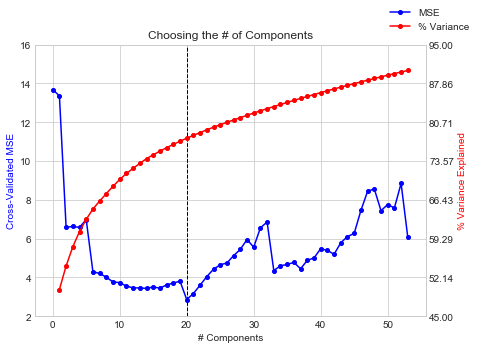

In [13]:
fig, ax1 = plt.subplots(figsize=(7,5))
color1 = 'blue'
ax1.set_xlabel('# Components')
ax1.set_ylabel('Cross-Validated MSE', color=color1)
ax1.plot(mse, color=color1, label='MSE', marker='o', markersize=4)
ax1.tick_params(axis='y')
plt.axvline(x=20, color='k', lw=1, ls='--')
ax2 = ax1.twinx()  # same x axis

# % Variance line
color2 = 'red'
ax2.set_ylabel('% Variance Explained', color=color2)  # we already handled the x-label with ax1
ax2.plot(np.arange(1,N_comps+1), np.cumsum(pca_train.explained_variance_ratio_)*100, color=color2, label='% Variance',marker='o', markersize=4)
ax2.tick_params(axis='y')
ax2.set_yticks(np.linspace(ax2.get_yticks()[0], ax2.get_yticks()[-1], len(ax1.get_yticks())))
ax2.grid(None)

# To determine which axis has a finer grid
l1 = len(ax1.get_yticks())
l2 = len(ax2.get_yticks())
if l1 > l2:
  b = ax2; l = l1
else:
  b = ax1; l = l2
b_ticks = np.linspace(b.get_yticks()[0],b.get_yticks()[-1],l)
b.set_yticks(b_ticks)

fig.legend()
plt.title('Choosing the # of Components')
plt.show()

### Evaluating Significant Genes

It can be shown that $V(\hat{\beta}) = V(\boldsymbol{\Psi}\hat{\theta}) = \sigma^2\boldsymbol{\Psi}(Z^{'}Z)^{-1}\boldsymbol{\Psi^{'}}$. A confidence interval can be constructed by $\hat{\beta} \pm t^{*}_{N-M-1}SE(\hat{\beta})$, where the standard error of $\hat{\beta}$ are the diagonal entries of  $V(\hat{\beta})$.

In [14]:
pca = PCA(n_components=20, svd_solver='full').fit(X) # Full solver is "full" because auto will employ a randomization algorithim that yeilds different results. Affects results...  
PSI = pca.components_.T
Z = pca.fit_transform(X) # OR Z = X @ PSI
#Principle components on the columns

Z_design = np.column_stack([np.ones(Z.shape[0]), Z])
fit = OLS(Y, Z_design).fit()
theta_hat = fit.params

beta_hat = PSI @ theta_hat[1:]
vbetahat = PSI @ np.array(fit.cov_params())[1:,1:] @ PSI.T
se_beta = np.diagonal(vbetahat)**.5
PCR_res = pd.DataFrame({'Est': beta_hat, 'Lwr': beta_hat + t.ppf(.025, fit.df_resid)*se_beta,
                       'Upr': beta_hat + t.ppf(.975, fit.df_resid)*se_beta}, index=gene_names)
PCR_res['Signif'] = PCR_res['Lwr']*PCR_res['Upr'] > 0
print('Significant Genes: {}'.format(sum(PCR_res['Signif']))) # 2928 Significant

# To check
#Z = X @ PSI
#eig = np.linalg.eigh(np.cov(X, rowvar=False, bias=False))
# eig[1][:,:-20:-1] # First 20 Components 

Significant Genes: 2928


### PCR Top Positive/Negative Genes

In [7]:
PCR_sig = PCR_res.loc[PCR_res['Signif']]
print('Malignant Significant Genes: {}'.format(sum(PCR_sig['Est'] > 0)))
PCR_sig.sort_values('Est', ascending=False).drop(labels=['Signif'], axis=1).head(10)

Malignant Significant Genes: 1310


,Est,Lwr,Upr
38218_at,0.022500,0.017571,0.027429
37639_at,0.022196,0.019518,0.024874
41106_at,0.021106,0.015985,0.026226
38803_at,0.019038,0.015480,0.022595
2046_at,0.018406,0.014620,0.022192
41181_r_at,0.018283,0.013800,0.022766
37579_at,0.016954,0.013217,0.020692
32741_at,0.016662,0.012299,0.021024
32001_s_at,0.016421,0.013134,0.019709
37193_at,0.016385,0.013337,0.019434


PCR Top Negative Genes

In [28]:
print('(Positive) Protective Significant Genes: {}'.format(sum(PCR_sig['Est'] < 0)))
PCR_sig.sort_values('Est', ascending=True).drop(labels=['Signif'], axis=1).head(10)

(Positive) Protective Significant Genes: 1618


,Est,Lwr,Upr
37124_i_at,-0.020975,-0.024798,-0.017152
37572_at,-0.020508,-0.024825,-0.016191
37347_at,-0.019601,-0.023321,-0.015882
34730_g_at,-0.017391,-0.019898,-0.014884
34818_at,-0.017316,-0.019941,-0.014691
35354_at,-0.017108,-0.020845,-0.013370
41401_at,-0.017066,-0.019604,-0.014527
37326_at,-0.017016,-0.019372,-0.014661
1898_at,-0.016996,-0.021542,-0.012449
38291_at,-0.016798,-0.019388,-0.014208


## Comparison

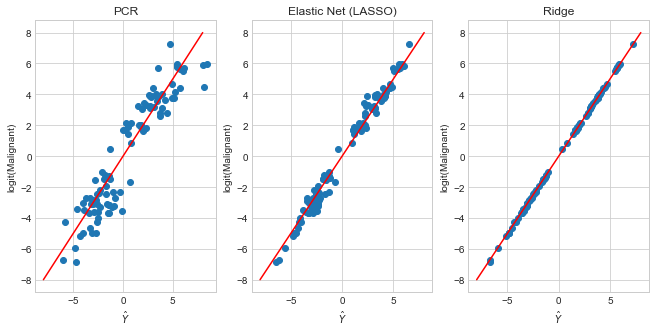

In [22]:
# Notes: Could not get centered intervals to work
# Python scales using unbiased sigma
# PCR had exact matches to R, LASSO had close matches. Ridge/Enet was way different.
# Specify solver=full on PCA for consistent results. 
# Had trouble finding optimal alpha for Ridge
line_b = 8
plt.figure(figsize=(11,5))
plt.subplot(1,3,1)
plt.scatter(fit.fittedvalues + theta_hat[0], Y)
plt.plot([-line_b,line_b],[-line_b,line_b], color='r') #abline(0,1)
plt.title('PCR')
plt.xlabel(r'$\hat{Y}$')
plt.ylabel('logit(Malignant)')

plt.subplot(1,3,2)
plt.scatter(model_enet.predict(X), Y)
plt.plot([-line_b,line_b],[-line_b,line_b], color='r') #abline(0,1)
plt.title('Elastic Net (LASSO)')
plt.xlabel(r'$\hat{Y}$')
plt.ylabel('logit(Malignant)')

plt.subplot(1,3,3)
plt.scatter(fit_ridge.predict(X), Y) # This is likely overfitting
plt.plot([-line_b,line_b],[-line_b,line_b], color='r') #abline(0,1)
plt.title('Ridge')
plt.xlabel(r'$\hat{Y}$')
plt.ylabel('logit(Malignant)')
plt.show()